# 0. 운영체제 과제 01
- 201901763 이지호

과제 1
마감 : 4월 30일(일) 저녁 6시까지
내용 :
수업때 이야기한 모든 스케줄링 방법을 구현하고 성능(5가지) 비교
Json 파일로 입력정보를 주면 포맷을 체크해서 비교판단
실시간스케줄링과 비실시간스케줄링을 Json  입력파일로 자동 구분처리
파이썬만 사용, 간트차트 출력을 포함하여 5가지를 모두 비교하고, 각 입력 데이터에 대해 그 중 종합적으로 제일 나은 방법을 "자동" 결과 리포팅 (리포팅 내용을 간단한 설명을 포함하여 자동 생성)
숫자 결과와 그래픽결과를 모두 나타내고 자동으로 리포팅
chatGPT 포함한 외부 자료 사용 절대 금함. 특성을 이미 잘 알고 있으므로,  사용흔적이 보이면 0점 처리

MarkDown 문서로 설명과 해설 그리고 주석이 포함된 주피터노트북 파일(*.ipynb 파일) 과 해당 파일을 PDF 로 저장한 파일, 
입력에 사용하는 json 파일 3개 (입력예제 3개임) 등, 
총 5개를 이러닝 사이트에 제출함.

실행 결과는 절대 평가함. (제대로 되었는지 여부, 제출한 입력 포맷에 평가 데이터를 적용해서 진행)
전체 결과는 등급제로 상대 평가함. 열심히 코드 만들고, 열심히 최선의 결과를 잘 만든 사람에게 높은 등급

위 내용을 기준으로 추가로 필요한 부분은 스스로 판단해서 진행하면 됨. 의도에서 벗어나거나 축소되면 안됨.


- First-come, First-Served (선입선출)
- Shortest-Job-First (최단작업우선)
- Shortest-remaining-time-first (최단잔여시간우선)
- Priority (우선순위)
- Round robin(퀀텀타임대로 순회)
- Priority + Round robin

# 1. 분석 준비

## 1.1. Load data
- 아래 변수 숫자 (int) 변경해가며, (1), (2), (3)번 case 마다 실행 가능.

In [1468]:
# case_[NUM] 변경해가며 출력 가능
_casenum = 2

In [1469]:
import json
import matplotlib.pyplot as plt

def data_loader():
    print("--Data_loader-----------------")
    _jsonfilename = "case" + str(_casenum) + ".json"
    with open(_jsonfilename) as f:
        json_object = json.load(f)

    num_of_processs = len(json_object['list'])
    print("Num of Process :", num_of_processs)

    # data checking
    assert json_object['list']
    for i in range(num_of_processs):
        assert json_object['list'][i]["Num"] > 0
        assert json_object['list'][i]["Burst_time"] >= 1
        assert json_object['list'][i]["Priority"] >= 0
        assert json_object['list'][i]["Arrival_time"] >= 0
    print("Data Loading Sucess")
    print("------------------------------")
    
    return json_object

## 1.2. Function

In [1470]:
_ALL_JOB_IS_DONE_ = -999
_NON_PROCESS_ = -1

def draw(_process, _order):
    print("Order is :", _order)
    print("--Start Analysis--------------")
    fig, ax = plt.subplots(figsize=(10, 1))

    _sum_of_busrt_time = 0
    _sum_of_response_time = 0
    _sum_of_turnaround_time = 0
    _sum_of_running_time = 0
    _now_time = 0
    _cumsum_waiting_time = 0

    _xlim_tickers = []

    # 완전동작 카운터
    _start_counter = 0
    _done_counter = 0


    for _pid, _runtime in _order:
        # NOT CPU RUNNING
        if (_pid < 0):
            if (_runtime > 0):
                # TAKE A REST
                _now_time += _runtime
            elif (_runtime == _ALL_JOB_IS_DONE_):
                # ALL JOP IS DONE
                break
        # CPU RUNNING
        else:
            # P_num은 1부터 시작하기에, index 맞추는 용도.
            _JUST_PRINT_IDX_ = _pid
            for i in range(len(_process)):
                if (_process[i]['Num'] == _pid):
                    _target = _process[i]
            _pid -= 1
            
            #_original_process_list대신에, target의 우선순위에 음수로 시작시간 저장
            # First come in CPU
            if (_target['Priority'] >= 0):
                _sum_of_response_time += _now_time
                print("START - P", _JUST_PRINT_IDX_, "    time is", _now_time)
                # 원본의 Priority 시작시간 메모장으로 사용함.
                _target['Priority'] = 0
                _target['Priority'] = - _now_time
                _start_counter += 1
            
            # if (_process[_pid]['Burst_time'] >= _runtime):
            _sum_of_busrt_time += _target['Burst_time']
            _cumsum_waiting_time += _now_time
            
            ax.barh(0, _runtime, left=_now_time, edgecolor='black')
            _now_time += _runtime
            ax.text(_now_time - _runtime/2, 0,
                    ('P'+str(_target['Num'])), ha='center', va='center')
            
            # burst_time - running time
            _target['Burst_time'] -= _runtime
            # JOP IS DONE ?
            if (_target['Burst_time'] == 0):
                print(" P", _JUST_PRINT_IDX_, "Turnaround time is",
                      _now_time - _target['Arrival_time'])
                _sum_of_turnaround_time += _now_time - _target['Arrival_time']
                print(" P", _JUST_PRINT_IDX_, "Running    time is", _now_time -
                      abs(_target['Priority']))
                _sum_of_running_time += _now_time - abs(_target['Priority'])
                print("EXIT  - P", _JUST_PRINT_IDX_, "    time is", _now_time)
                print("")
                _done_counter +=1
        _xlim_tickers.append(_now_time)
    
    # ploting
    print("------------------------------")
    ax.set_xticks(_xlim_tickers)
    ax.set_xlim([0, _now_time])
    ax.set_yticks([])
    if (_start_counter != len(_process)):
        print("응 오류야 ㅋㅋ~ 정상시작 횟수 :", _start_counter)
    else:
        print("ALL START GOOD JOB!!!")
    if (_done_counter != len(_process)):
        print("응 오류야 ㅋㅋ~ 정상종료 횟수 :", _done_counter)
    else:
        print("ALL EXIT  GOOD JOB!!!")
    plt.show()
    
    # print value
    # cpu 이용률
    print("CPU utilization : %2.2f" % float(_sum_of_busrt_time/_now_time*100), "%")
    # 프로세스를 cpu가 실행하지 않은 평균 대기시간
    print("Average waiting time :", _cumsum_waiting_time/len(_process))
    # 프로세스를 처음으로 실행하는 데에 걸린 시간
    print("Average Response time :", _sum_of_response_time/len(_process))
    # 시작하고 나서부터 완료까지 걸린 시간
    print("Average Running time :", _sum_of_running_time/len(_process))
    # 처음 대기 부터, 작업 완료에 대한 총 소요 시간 / p's 종료시점 - arrival_time
    print("Average Turnaround time :", _sum_of_turnaround_time/len(_process))

# 2. 비선점형

## 2.1. First-come, First-Served (선입선출)

--Data_loader-----------------
Num of Process : 4
Data Loading Sucess
------------------------------
Order is : [[1, 6], [2, 8], [-1, 10], [3, 7], [4, 3], [-1, -999]]
--Start Analysis--------------
START - P 1     time is 0
 P 1 Turnaround time is 6
 P 1 Running    time is 6
EXIT  - P 1     time is 6

START - P 2     time is 6
 P 2 Turnaround time is 14
 P 2 Running    time is 8
EXIT  - P 2     time is 14

START - P 3     time is 24
 P 3 Turnaround time is 31
 P 3 Running    time is 7
EXIT  - P 3     time is 31

START - P 4     time is 31
 P 4 Turnaround time is 34
 P 4 Running    time is 3
EXIT  - P 4     time is 34

------------------------------
ALL START GOOD JOB!!!
ALL EXIT  GOOD JOB!!!


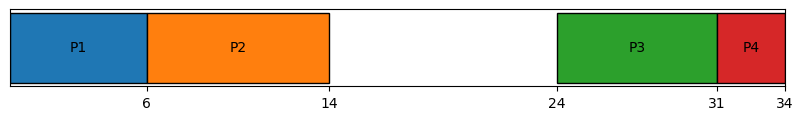

CPU utilization : 70.59 %
Average waiting time : 15.25
Average Response time : 15.25
Average Running time : 6.0
Average Turnaround time : 21.25


In [1471]:
_order = []
tmp = data_loader()
tmp = sorted(tmp['list'], key=lambda x: x['Arrival_time'])

for i in tmp:
    _order.append([i['Num'], i['Burst_time']])
    
_order.insert(2, [_NON_PROCESS_, 10])
_order.append([_NON_PROCESS_, _ALL_JOB_IS_DONE_])

draw(tmp, _order)

## 2.2. Shortest-Job-First (최단작업우선)

--Data_loader-----------------
Num of Process : 4
Data Loading Sucess
------------------------------
Order is : [[4, 3], [1, 6], [3, 7], [2, 8], [-1, -999]]
--Start Analysis--------------
START - P 4     time is 0
 P 4 Turnaround time is 3
 P 4 Running    time is 3
EXIT  - P 4     time is 3

START - P 1     time is 3
 P 1 Turnaround time is 9
 P 1 Running    time is 6
EXIT  - P 1     time is 9

START - P 3     time is 9
 P 3 Turnaround time is 16
 P 3 Running    time is 7
EXIT  - P 3     time is 16

START - P 2     time is 16
 P 2 Turnaround time is 24
 P 2 Running    time is 8
EXIT  - P 2     time is 24

------------------------------
ALL START GOOD JOB!!!
ALL EXIT  GOOD JOB!!!


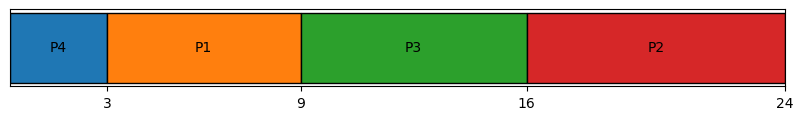

CPU utilization : 100.00 %
Average waiting time : 7.0
Average Response time : 7.0
Average Running time : 6.0
Average Turnaround time : 13.0


In [1474]:
_order = []
tmp = data_loader()
tmp = sorted(tmp['list'], key=lambda x: x['Arrival_time'])

for i in tmp:
    # todo
    # 도착 순서대로 자를 수 잇어야함
    _order.append([i['Num'], i['Burst_time']])
_order.append([_NON_PROCESS_, _ALL_JOB_IS_DONE_])

draw(tmp, _order)

## 2.3. Priority First Served (우선순위먼저)

--Data_loader-----------------
Num of Process : 4
Data Loading Sucess
------------------------------
Order is : [[3, 7], [4, 3], [-1, 10], [2, 8], [1, 6], [-1, -999]]
--Start Analysis--------------
START - P 3     time is 0
 P 3 Turnaround time is 7
 P 3 Running    time is 7
EXIT  - P 3     time is 7

START - P 4     time is 7
 P 4 Turnaround time is 10
 P 4 Running    time is 3
EXIT  - P 4     time is 10

START - P 2     time is 20
 P 2 Turnaround time is 28
 P 2 Running    time is 8
EXIT  - P 2     time is 28

START - P 1     time is 28
 P 1 Turnaround time is 34
 P 1 Running    time is 6
EXIT  - P 1     time is 34

------------------------------
ALL START GOOD JOB!!!
ALL EXIT  GOOD JOB!!!


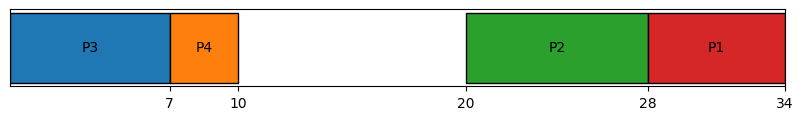

CPU utilization : 70.59 %
Average waiting time : 13.75
Average Response time : 13.75
Average Running time : 6.0
Average Turnaround time : 19.75


In [1473]:
# 기아 현상 방지해줘야함
_order = []
tmp = data_loader()
tmp = sorted(tmp['list'], key=lambda x: x['Priority'])
for i in tmp:
    _order.append([i['Num'], i['Burst_time']])
_order.insert(2, [_NON_PROCESS_, 10])
_order.append([_NON_PROCESS_, _ALL_JOB_IS_DONE_])

draw(tmp, _order)

## 2.4. Round robin(퀀텀타임대로 순회)


## 2.5. Priority + Round robin

# 3. 선점형

## 3.1. Shortest-Job-First (최단작업우선)

## 3.2. Priority First Served (우선순위먼저)

## 3.3. Shortest-remaining-time-first (최단잔여시간우선)
